# Number of bikes booked on a particular day

## a)  Predicting the values using Random Forest Regression

In [1]:
import pandas as pd
Bikeshare = pd.read_csv('data/BikeSharingDaily.csv', parse_dates=[0])

FileNotFoundError: [Errno 2] File b'data/BikeSharingDaily.csv' does not exist: b'data/BikeSharingDaily.csv'

head(n) represents dataframe with top n rows (n default value is 5)

In [ ]:
Bikeshare.head()

Some modules used for RandomForestRegression provided by the professor :


(train_test_split - Split arrays or matrices into random train and test subsets)
(metrics - The sklearn.metrics module includes score functions, performance metrics and pairwise metrics and distance computations)
(RandomForest - A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

columns - Represents all column headers in the dataset

In [ ]:
Bikeshare.columns

In [ ]:
# Shifting the 'count' column values down to predict for next day
pd.concat([Bikeshare.cnt, Bikeshare.cnt.shift(-1)], axis=1)

'valid' function is used to eliminate non significant columns like 'timestamp' and 'cnt' column which we are predicting.

Let's create our training independent variables (X_train) and test independent variables (X_test), and our training dependent variable (y_train) and test (y_test).
Using uppercase X to denote that X is multi-dimensional, while I use a lowercase y to denote that y is one-dimensional

We also need to drop N/As from all cells.

random_state is used to keep same value in train and test datasets irrespective of number of runs

In [ ]:
def valid(col):
    return 'instant' not in col and 'dteday' not in col and  'cnt' not in col and 'casual' not in col and 'registered' not in col 
X = Bikeshare[[x for x in Bikeshare.columns if valid(x)]].iloc[300:]
y = Bikeshare.cnt.shift(-300).dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

The RandomForestRegressor class of the sklearn.ensemble library is used to solve regression problems with the help of  random forest model

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

Let's score our model at how good it is in predicting tomorrow's booked number of bikes)

In [ ]:
rf_model.score(X_test, y_test)

In [ ]:
# So its 81.3%

In [ ]:
pd.concat([pd.Series(rf_model.predict(X_test)), y_test.reset_index(
drop=True)], axis=1)

In [ ]:
# lets looke at the important features in predicting number of bikes booked for tomorrow!!!
sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True)

## b) MLE  - For estimating the model parameters

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
Bikeshare.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [35]:
def valid(col):
    return 'cnt' in col
X = Bikeshare[[x for x in Bikeshare.columns if valid(x)]].iloc[1:]
X

,cnt
1,801
2,1349
3,1562
4,1600
5,1606
...,...
726,2114
727,3095
728,1341
729,1796


Text(0, 0.5, 'Count')

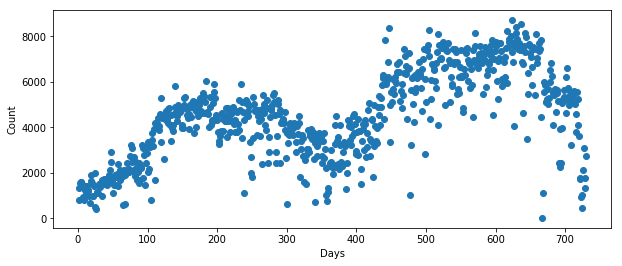

In [36]:
fig, (ax1) = plt.subplots(1, figsize=(10, 4))

ax1.plot(X,'o')
ax1.set_xlabel('Days')
ax1.set_ylabel('Count')

In [37]:
# By looking the above plot it looks like a bimodal distribution(2 peaks) in the dataspan of two years -
# - one peak in the range of 1-350 and 
# - second peak in the range of 400-700 

In [38]:
# Using another dataset - features of different wallmart stores from different locations

In [39]:
features = pd.read_csv("data/StoreFeatures.csv", index_col=0, na_values='NA', delim_whitespace=False)
features.head()

,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Store,,,,,,,,,,,
1,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
1,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
1,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
1,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [46]:
def valid(col):
    return 'Temperature' in col 
X = features[[x for x in features.columns if valid(x)]].iloc[:300]
X

,Temperature
Store,
1,42.31
1,38.51
1,39.93
1,46.63
1,46.50
...,...
2,68.43
2,68.08
2,65.69


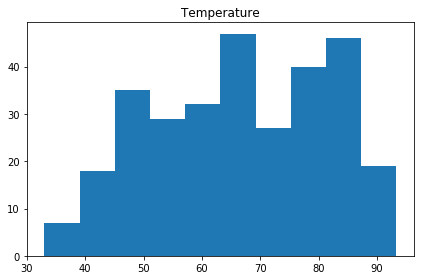

In [47]:
_ = X.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

In [48]:
poisson_like = lambda x, lam: np.exp(-lam) * (lam**x) / (np.arange(x)+1).prod()

lam = 5
np.sum(poisson_like(yi, lam) for yi in set(X["Temperature"]))


6.465592706959151e-18